## Clustering With K Means

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

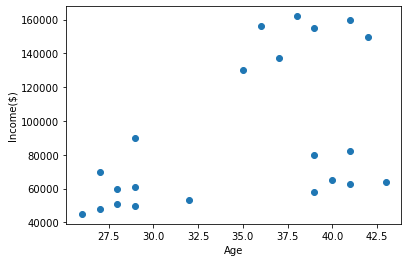

In [3]:
plt.scatter(data.Age,data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [4]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [5]:
data['cluster']=y_predicted
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [6]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

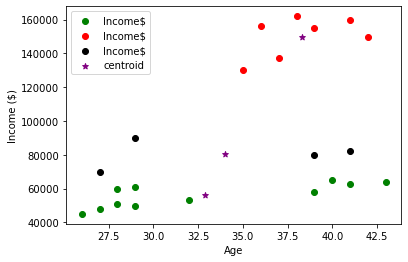

In [7]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
plt.scatter(data1.Age,data1['Income($)'],color='green',label='Income$')
plt.scatter(data2.Age,data2['Income($)'],color='red', label='Income$')
plt.scatter(data3.Age,data3['Income($)'],color='black', label='Income$')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

### Preprocessing using min max scaler

In [8]:
scaler = MinMaxScaler()

scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

In [9]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


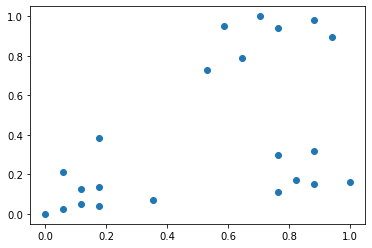

In [10]:
plt.scatter(data.Age,data['Income($)'])

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [13]:
data['cluster']=y_predicted
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [14]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

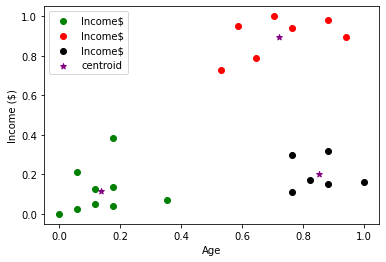

In [15]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
plt.scatter(data1.Age,data1['Income($)'],color='green',label='Income$')
plt.scatter(data2.Age,data2['Income($)'],color='red', label='Income$')
plt.scatter(data3.Age,data3['Income($)'],color='black', label='Income$')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

### Elbow Plot

In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

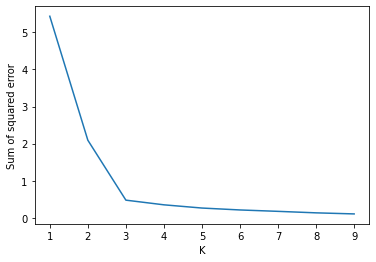

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)